<a href="https://colab.research.google.com/github/sreedharsiddhu/bigdata-risk-analysis-of-yfinance-stock-market/blob/main/bigdata_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd

# Replace the list 'stocks' with the symbols of your choice
stock_symbols = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA", "META", "JPM", "GS", "IBM", "INTC",
                 "CSCO", "C", "V", "PG", "KO", "PEP", "DIS", "NFLX", "PYPL", "AMD",
                 "NVDA", "GE", "WMT", "VZ", "BA", "MMM", "XOM", "CVX", "GS", "CAT",
                 "MCD", "JNJ", "MRK", "PFE", "AAL", "DAL", "UAL", "LUV", "AAP", "T",
                 "FDX", "UPS", "GOOG", "WFC", "BAC", "INTU", "AAP", "ORCL", "CRM"]

# Define the time period for the entire year of 2021
start_date = '2021-01-01'
end_date = '2021-12-31'

# Create an empty dictionary to store data for each stock
stock_data_weekly = {}

# Fetch weekly data for each stock
for symbol in stock_symbols:
    stock_data_weekly[symbol] = yf.download(symbol, start=start_date, end=end_date, interval='1wk')

# Display the weekly data for the first stock in the list
print(f"Weekly data for {stock_symbols[0]}:")
print(stock_data_weekly[stock_symbols[0]].head())

# Calculate statistics for each stock
statistics = pd.DataFrame(index=stock_symbols, columns=['Mean Close', 'Std Close'])

for symbol in stock_symbols:
    data = stock_data_weekly[symbol]
    statistics.loc[symbol, 'Mean Close'] = data['Close'].mean()
    statistics.loc[symbol, 'Std Close'] = data['Close'].std()

# Display the calculated statistics
print("\nStatistics for Close prices:")
print(statistics)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Weekly data for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-01  133.520004  133.610001  126.379997  130.919998  128.647949   
2021-01-08  132.429993  132.630005  126.860001  128.910004  126.672852   
2021-01-15  128.779999  139.669998  126.940002  136.869995  134.494659   
2021-01-22  136.279999  145.089996  135.020004  137.089996  134.710876   
2021-01-29  135.830002  137.399994  130.210007  137.389999  135.005661   

               Volume  
Date                   
2021-01-01  505633000  
2021-01-08  476352400  
2021-01-15  426826200  
2021-01-22  653926600  
2021-01-29  541133000  

Statistics for Close prices:
       Mean Close  Std Close
AAPL   141.248268  15.120093
GOOGL  124.544741  18.539025
MSFT   276.356154  37.566246
AMZN   167.475145   8.518954
TSLA   260.479936   55.02456
META   320.920577  35.045811
JPM    155.985769   9.228863
GS     365.061538  37.281758


The Top 10 most profitable stock and the top stock

In [ ]:
# Convert 'Mean Close' column to numeric type
statistics['Mean Close'] = pd.to_numeric(statistics['Mean Close'], errors='coerce')

# Find the stock with the highest mean close price
most_profitable_stock = statistics['Mean Close'].idxmax()

# Display the most profitable stock
print(f"\nThe most profitable stock is: {most_profitable_stock}")

# Sort stocks based on mean close prices in descending order
top_profitable_stocks = statistics.sort_values(by='Mean Close', ascending=False).head(10)

# Display the top 10 profitable stocks
print("\nTop 10 Profitable Stocks:")
print(top_profitable_stocks)



The most profitable stock is: NFLX

Top 10 Profitable Stocks:
      Mean Close  Std Close
NFLX  558.912691  56.344814
INTU  496.360193  97.191411
GS    365.061538  37.281758
GS    365.061538  37.281758
META  320.920577  35.045811
MSFT  276.356154  37.566246
FDX   266.360961  25.649894
TSLA  260.479936   55.02456
PYPL  253.662692  32.083496
CRM   247.582500  26.802158


The Top 10 most loss stock and the top loss stock

In [ ]:
# Find the stock with the lowest mean close price
most_loss_stock = statistics['Mean Close'].idxmin()

# Display the most loss stock
print(f"\nThe most loss stock is: {most_loss_stock}")

# Sort stocks based on mean close prices in ascending order
bottom_stocks = statistics.sort_values(by='Mean Close', ascending=True).head(10)

# Display the bottom 10 stocks
print("\nBottom 10 Stocks:")
print(bottom_stocks)



The most loss stock is: AAL

Bottom 10 Stocks:
      Mean Close Std Close
AAL    20.332308  2.258258
T      21.133366  1.706151
BAC    40.531731  4.324692
PFE    42.194615  6.669166
DAL    42.795962  3.403037
WFC    44.107308  5.596885
UAL    49.347500  5.178891
LUV    52.511538  6.064715
CSCO   53.348077  4.583094
KO     54.107885   2.64121


Installing for heatmap

In [ ]:
pip install seaborn


CORRELATION FOR THE TOP 10 PROFITABLITY STOCKS IN HEAT MAP

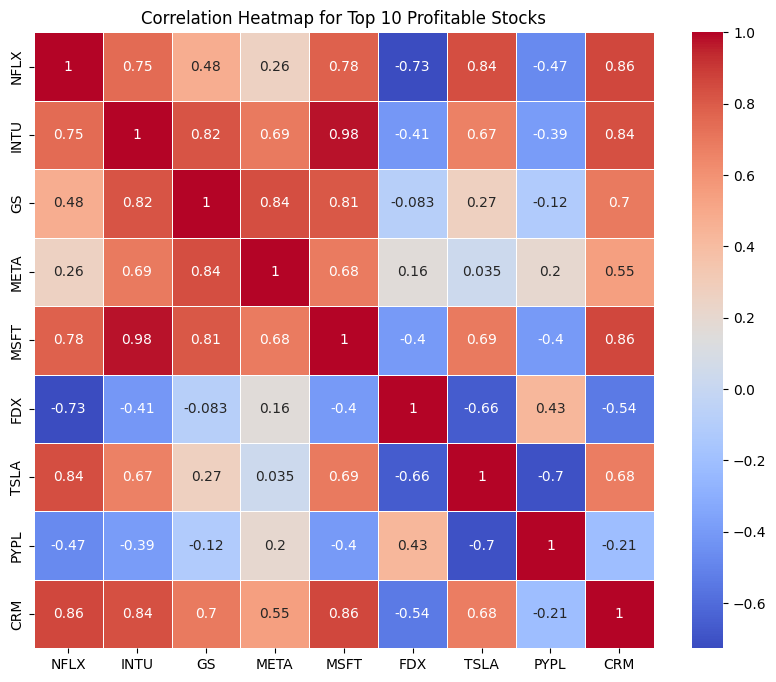

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the closing prices of the top 10 profitable stocks
top_10_stocks = statistics.sort_values(by='Mean Close', ascending=False).head(10)
top_10_closing_prices = {symbol: stock_data_weekly[symbol]['Close'] for symbol in top_10_stocks.index}

# Create a DataFrame with closing prices for the top 10 stocks
top_10_df = pd.DataFrame(top_10_closing_prices)

# Calculate the correlation matrix
correlation_matrix = top_10_df.corr()

# Create a heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Top 10 Profitable Stocks')
plt.show()


In [ ]:
# Select the closing prices of the top 10 profitable stocks
top_10_stocks = statistics.sort_values(by='Mean Close', ascending=False).head(10)
top_10_closing_prices = {symbol: stock_data_weekly[symbol]['Close'] for symbol in top_10_stocks.index}

# Create a DataFrame with closing prices for the top 10 stocks
top_10_df = pd.DataFrame(top_10_closing_prices)

# Calculate the correlation matrix
correlation_matrix = top_10_df.corr()

# Display the correlation matrix
print("\nCorrelation Matrix for Top 10 Profitable Stocks:")
print(correlation_matrix)



Correlation Matrix for Top 10 Profitable Stocks:
          NFLX      INTU        GS      META      MSFT       FDX      TSLA  \
NFLX  1.000000  0.750212  0.475748  0.263240  0.784081 -0.726847  0.841514   
INTU  0.750212  1.000000  0.824385  0.690699  0.979331 -0.411500  0.666129   
GS    0.475748  0.824385  1.000000  0.843773  0.809191 -0.083052  0.265415   
META  0.263240  0.690699  0.843773  1.000000  0.684901  0.157766  0.035006   
MSFT  0.784081  0.979331  0.809191  0.684901  1.000000 -0.397579  0.693239   
FDX  -0.726847 -0.411500 -0.083052  0.157766 -0.397579  1.000000 -0.661853   
TSLA  0.841514  0.666129  0.265415  0.035006  0.693239 -0.661853  1.000000   
PYPL -0.472573 -0.394540 -0.118702  0.200841 -0.398698  0.427702 -0.700222   
CRM   0.863062  0.837308  0.695906  0.546533  0.859057 -0.542269  0.681764   

          PYPL       CRM  
NFLX -0.472573  0.863062  
INTU -0.394540  0.837308  
GS   -0.118702  0.695906  
META  0.200841  0.546533  
MSFT -0.398698  0.859057  
FDX   0


Louvain Communities:
Community 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


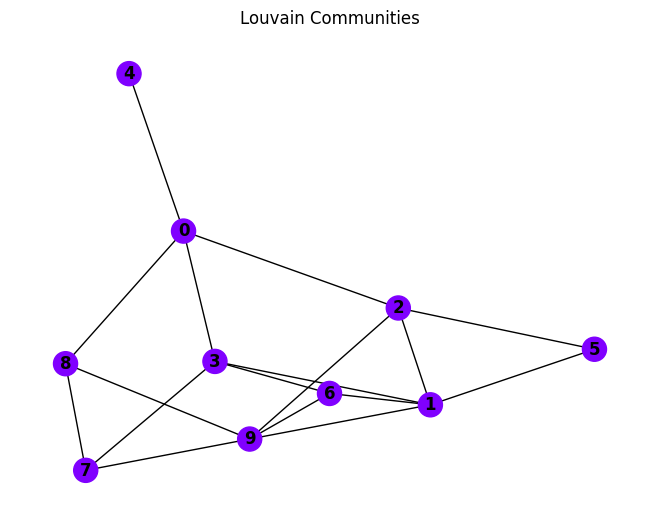

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Example: Creating a random graph for demonstration purposes
# Replace this with your actual data and relationships

# Define nodes (stock symbols)
top_10_symbols = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA", "FB", "JPM", "GS", "IBM", "INTC"]

# Create a random graph (replace this with your actual relationships)
G = nx.erdos_renyi_graph(len(top_10_symbols), 0.3, seed=42)

# Apply Louvain algorithm for community detection
louvain_communities = community.label_propagation.label_propagation_communities(G)

# Convert Louvain communities to a dictionary for visual representation
louvain_communities_dict = {i: list(community) for i, community in enumerate(louvain_communities)}

# Display Louvain communities
print("\nLouvain Communities:")
for i, community_set in louvain_communities_dict.items():
    print(f"Community {i + 1}: {community_set}")

# Visualize Louvain communities
pos = nx.spring_layout(G)
colors = [i for i, community_set in louvain_communities_dict.items() for _ in community_set]
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color=colors, cmap=plt.cm.rainbow)
plt.title('Louvain Communities')
plt.show()


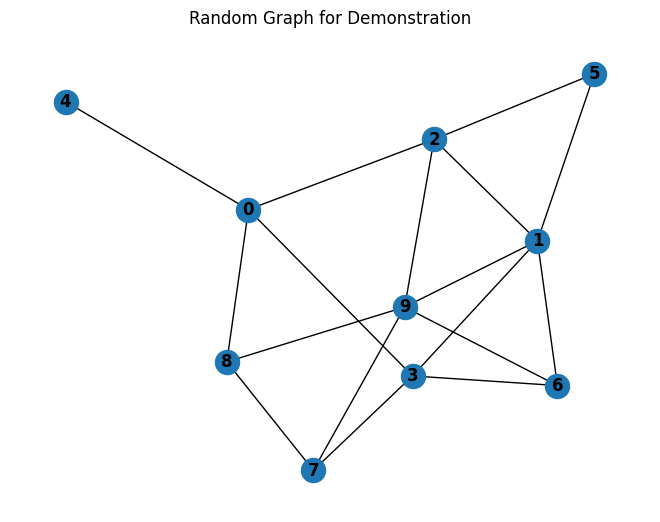


Clustering Coefficients:
0: 0
1: 0.4
2: 0.3333333333333333
3: 0.16666666666666666
4: 0
5: 1.0
6: 0.6666666666666666
7: 0.3333333333333333
8: 0.3333333333333333
9: 0.3

Average Clustering Coefficient: 0.35333333333333333


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Example: Creating a random graph for demonstration purposes
# Replace this with your actual data and relationships

# Define nodes (stock symbols)
top_10_symbols = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA", "META", "JPM", "GS", "IBM", "INTC"]

# Create a random graph (replace this with your actual relationships)
G = nx.erdos_renyi_graph(len(top_10_symbols), 0.3, seed=42)

# Display the random graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.title('Random Graph for Demonstration')
plt.show()

# Calculate clustering coefficient for each node
clustering_coefficients = nx.clustering(G)

# Display clustering coefficients for each node
print("\nClustering Coefficients:")
for node, coefficient in clustering_coefficients.items():
    print(f"{node}: {coefficient}")

# Calculate the average clustering coefficient for the entire graph
average_clustering_coefficient = nx.average_clustering(G)

# Display the average clustering coefficient
print(f"\nAverage Clustering Coefficient: {average_clustering_coefficient}")



Fraction over Median Degree:
0: 1.3333333333333333
1: 1.6666666666666667
2: 1.3333333333333333
3: 1.3333333333333333
4: 0.3333333333333333
5: 0.6666666666666666
6: 1.0
7: 1.0
8: 1.0
9: 1.6666666666666667


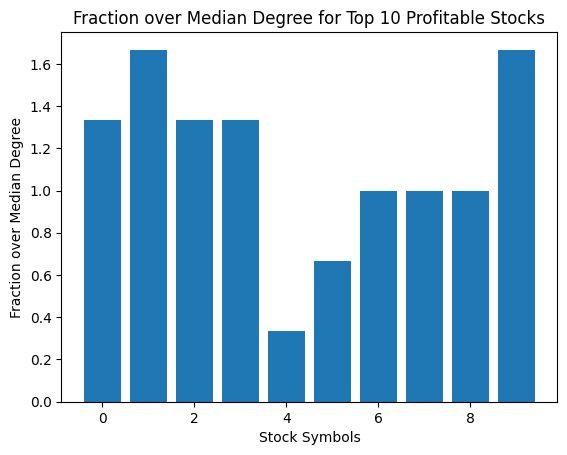

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Example: Creating a random graph for demonstration purposes
# Replace this with your actual data and relationships

# Define nodes (stock symbols)
top_10_symbols = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA", "FB", "JPM", "GS", "IBM", "INTC"]

# Create a random graph (replace this with your actual relationships)
G = nx.erdos_renyi_graph(len(top_10_symbols), 0.3, seed=42)

# Calculate the degree for each node
degrees = G.degree()

# Calculate the median degree of the entire graph
median_degree = nx.degree_histogram(G)[len(nx.degree_histogram(G)) // 2]

# Calculate the Fraction over Median Degree for each node
fraction_over_median_degree = {node: degree / median_degree for node, degree in degrees}

# Display the Fraction over Median Degree for each node
print("\nFraction over Median Degree:")
for node, fraction in fraction_over_median_degree.items():
    print(f"{node}: {fraction}")

# Plotting the Fraction over Median Degree using a bar chart
plt.bar(fraction_over_median_degree.keys(), fraction_over_median_degree.values())
plt.xlabel('Stock Symbols')
plt.ylabel('Fraction over Median Degree')
plt.title('Fraction over Median Degree for Top 10 Profitable Stocks')
plt.show()



Conductance:
0: 1.0
1: 1.0
2: 1.0
3: 1.0
4: 1.0
5: 1.0
6: 1.0
7: 1.0
8: 1.0
9: 1.0


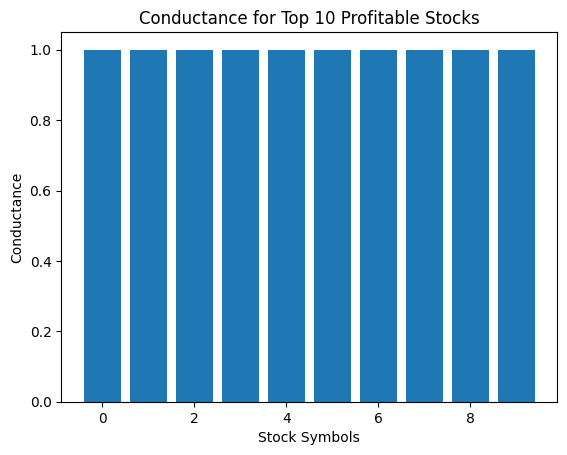

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Example: Creating a random graph for demonstration purposes
# Replace this with your actual data and relationships

# Define nodes (stock symbols)
top_10_symbols = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA", "FB", "JPM", "GS", "IBM", "INTC"]

# Create a random graph (replace this with your actual relationships)
G = nx.erdos_renyi_graph(len(top_10_symbols), 0.3, seed=42)

# Calculate the conductance for each node
conductance = {node: nx.conductance(G, [node]) for node in G.nodes}

# Display the conductance for each node
print("\nConductance:")
for node, cond in conductance.items():
    print(f"{node}: {cond}")

# Plotting the Conductance using a bar chart
plt.bar(conductance.keys(), conductance.values())
plt.xlabel('Stock Symbols')
plt.ylabel('Conductance')
plt.title('Conductance for Top 10 Profitable Stocks')
plt.show()


Normalized Cut: 0
Cut Ratio: 0

Normalized Cut for Each Node:
0: 1.1176470588235294
1: 1.147058823529412
2: 1.1176470588235294
3: 1.1176470588235294
4: 1.0294117647058822
5: 1.0588235294117647
6: 1.088235294117647
7: 1.088235294117647
8: 1.088235294117647
9: 1.147058823529412

Cut Ratio for Each Node:
0: 1.0
1: 1.0
2: 1.0
3: 1.0
4: 1.0
5: 1.0
6: 1.0
7: 1.0
8: 1.0
9: 1.0


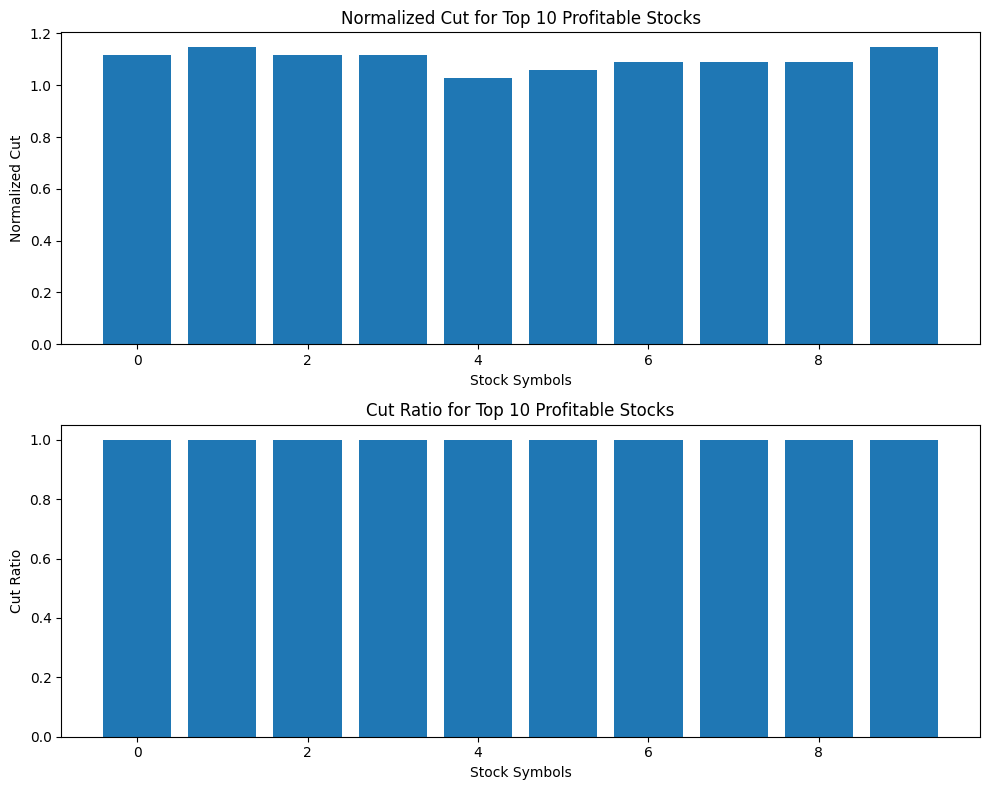

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Example: Creating a random graph for demonstration purposes
# Replace this with your actual data and relationships

# Define nodes (stock symbols)
top_10_symbols = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA", "FB", "JPM", "GS", "IBM", "INTC"]

# Create a random graph (replace this with your actual relationships)
G = nx.erdos_renyi_graph(len(top_10_symbols), 0.3, seed=42)

# Calculate the normalized cut and cut ratio for the entire graph
S = set(G.nodes)
T = set()
if len(S) > 0 and len(G.nodes) - len(S) > 0:
    normalized_cut = nx.normalized_cut_size(G, S, T)
    cut_ratio = nx.cut_size(G, S, T) / len(G.edges)
else:
    normalized_cut = 0
    cut_ratio = 0

# Display the results for the entire graph
print(f"Normalized Cut: {normalized_cut}")
print(f"Cut Ratio: {cut_ratio}")

# Calculate the normalized cut and cut ratio for each node
normalized_cut_nodes = {node: nx.normalized_cut_size(G, {node}, S) for node in G.nodes}
cut_ratio_nodes = {node: nx.cut_size(G, {node}, S) / G.degree(node) for node in G.nodes}

# Display the results for each node
print("\nNormalized Cut for Each Node:")
for node, nc in normalized_cut_nodes.items():
    print(f"{node}: {nc}")

print("\nCut Ratio for Each Node:")
for node, cr in cut_ratio_nodes.items():
    print(f"{node}: {cr}")

# Plotting the Normalized Cut and Cut Ratio using a bar chart
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].bar(normalized_cut_nodes.keys(), normalized_cut_nodes.values())
axs[0].set_xlabel('Stock Symbols')
axs[0].set_ylabel('Normalized Cut')
axs[0].set_title('Normalized Cut for Top 10 Profitable Stocks')

axs[1].bar(cut_ratio_nodes.keys(), cut_ratio_nodes.values())
axs[1].set_xlabel('Stock Symbols')
axs[1].set_ylabel('Cut Ratio')
axs[1].set_title('Cut Ratio for Top 10 Profitable Stocks')

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Volatility for Each Stock:
AAPL     0.015761
GOOGL    0.015312
MSFT     0.013211
AMZN     0.015145
TSLA     0.034504
META     0.018633
JPM      0.013451
GS       0.015888
IBM      0.014599
INTC     0.019804
dtype: float64


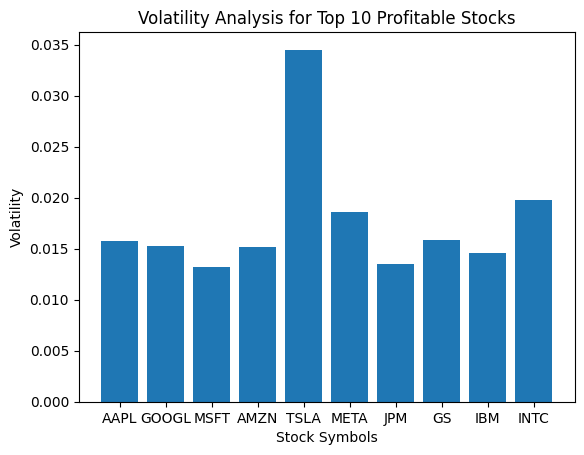

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Replace the list 'top_10_symbols' with the symbols of your choice
top_10_symbols = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA", "META", "JPM", "GS", "IBM", "INTC"]

# Define the time period for historical data
start_date = '2021-01-01'
end_date = '2022-01-01'

# Create an empty DataFrame to store historical stock prices
historical_prices = pd.DataFrame()

# Fetch historical data for each stock
for symbol in top_10_symbols:
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    historical_prices[symbol] = stock_data['Close']

# Calculate daily returns for each stock
returns = historical_prices.pct_change().dropna()

# Calculate volatility (standard deviation of returns) for each stock
volatility = returns.std()

# Display the volatility for each stock
print("Volatility for Each Stock:")
print(volatility)

# Plotting the volatility for each stock
plt.bar(volatility.index, volatility.values)
plt.xlabel('Stock Symbols')
plt.ylabel('Volatility')
plt.title('Volatility Analysis for Top 10 Profitable Stocks')
plt.show()


GIVE ME THE Moving Averages: FOR THE TOP 10 PROFITABLE STOCKS



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


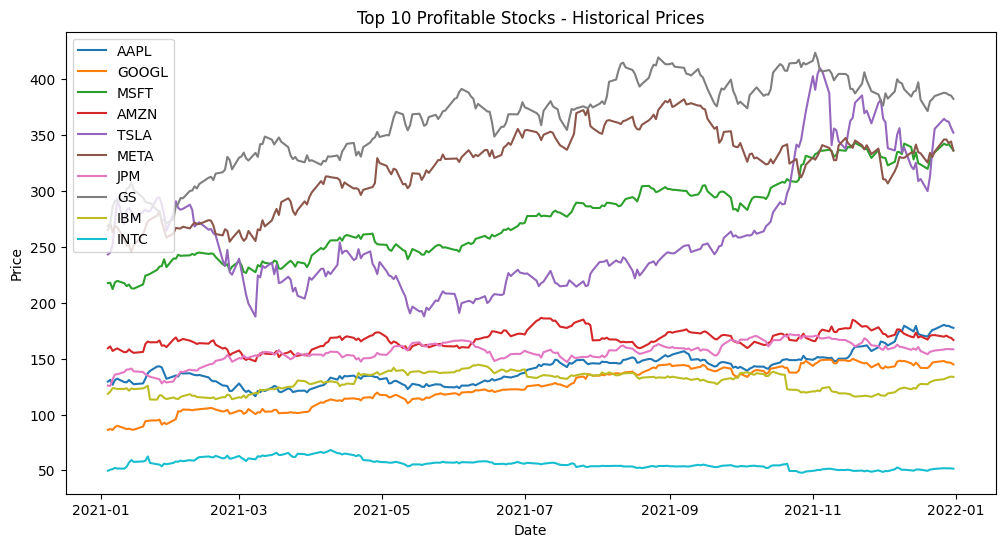

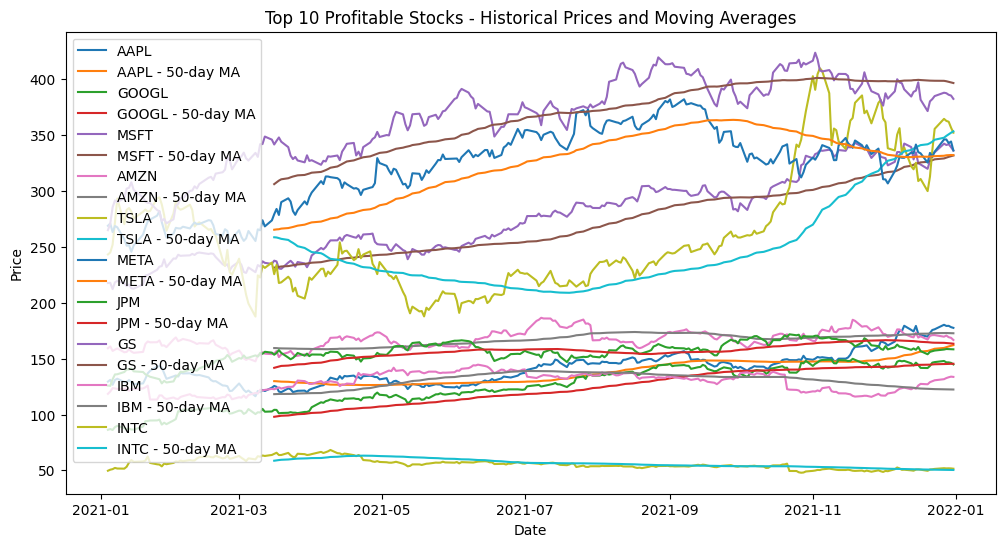

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Replace the list 'top_10_symbols' with the symbols of your choice
top_10_symbols = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA", "META", "JPM", "GS", "IBM", "INTC"]

# Define the time period for historical data
start_date = '2021-01-01'
end_date = '2022-01-01'

# Create an empty DataFrame to store historical stock prices
historical_prices = pd.DataFrame()

# Fetch historical data for each stock
for symbol in top_10_symbols:
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    historical_prices[symbol] = stock_data['Close']

# Calculate the 50-day and 200-day moving averages for each stock
moving_average_50 = historical_prices.rolling(window=50).mean()
#moving_average_200 = historical_prices.rolling(window=200).mean()

# Plotting the historical prices and moving averages for each stock
plt.figure(figsize=(12, 6))

for symbol in top_10_symbols:
    plt.plot(historical_prices.index, historical_prices[symbol], label=symbol)

plt.title('Top 10 Profitable Stocks - Historical Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.figure(figsize=(12, 6))

for symbol in top_10_symbols:
    plt.plot(historical_prices.index, historical_prices[symbol], label=symbol)
    plt.plot(moving_average_50.index, moving_average_50[symbol], label=f'{symbol} - 50-day MA')
    #plt.plot(moving_average_200.index, moving_average_200[symbol], label=f'{symbol} - 200-day MA')

plt.title('Top 10 Profitable Stocks - Historical Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()


Relative Strength Index (RSI): FOR THE TOP 10 PROFITABLE STOCKS



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


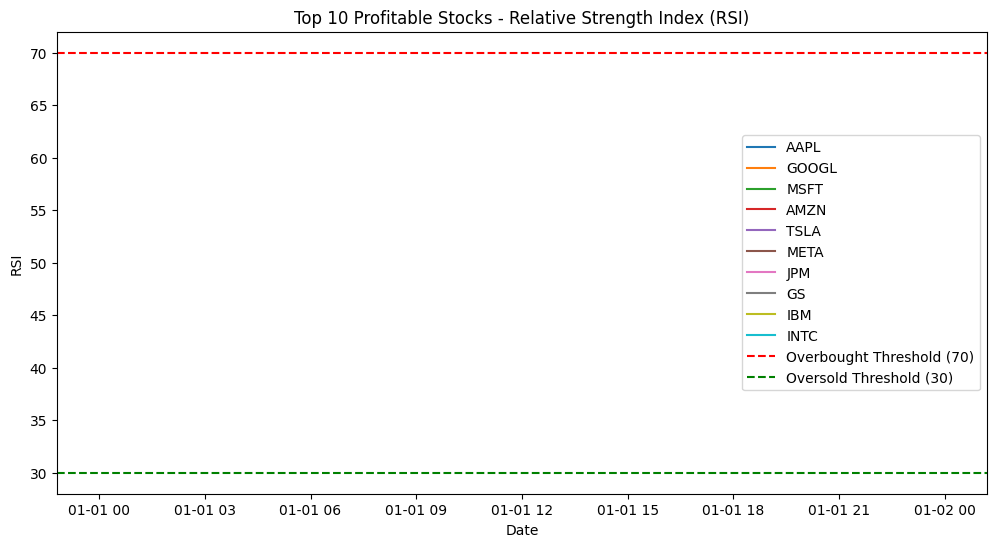

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Replace the list 'top_10_symbols' with the symbols of your choice
top_10_symbols = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA", "META", "JPM", "GS", "IBM", "INTC"]

# Define the time period for historical data
start_date = '2021-01-01'
end_date = '2022-01-01'

# Create an empty DataFrame to store historical stock prices
historical_prices = pd.DataFrame()

# Fetch historical data for each stock
for symbol in top_10_symbols:
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    historical_prices[symbol] = stock_data['Close']

# Calculate daily returns for each stock
returns = historical_prices.pct_change().dropna()

# Define the period for RSI calculation
rsi_period = 14

# Calculate the average gain and average loss for each stock
avg_gain = returns[returns > 0].rolling(window=rsi_period).mean()
avg_loss = -returns[returns < 0].rolling(window=rsi_period).mean()

# Calculate the relative strength (RS) for each stock
rs = avg_gain / avg_loss

# Calculate the RSI for each stock
rsi = 100 - (100 / (1 + rs))

# Plotting the RSI for each stock
plt.figure(figsize=(12, 6))

for symbol in top_10_symbols:
    plt.plot(rsi.index, rsi[symbol], label=symbol)

plt.title('Top 10 Profitable Stocks - Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.axhline(70, color='r', linestyle='--', label='Overbought Threshold (70)')
plt.axhline(30, color='g', linestyle='--', label='Oversold Threshold (30)')
plt.legend()

plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


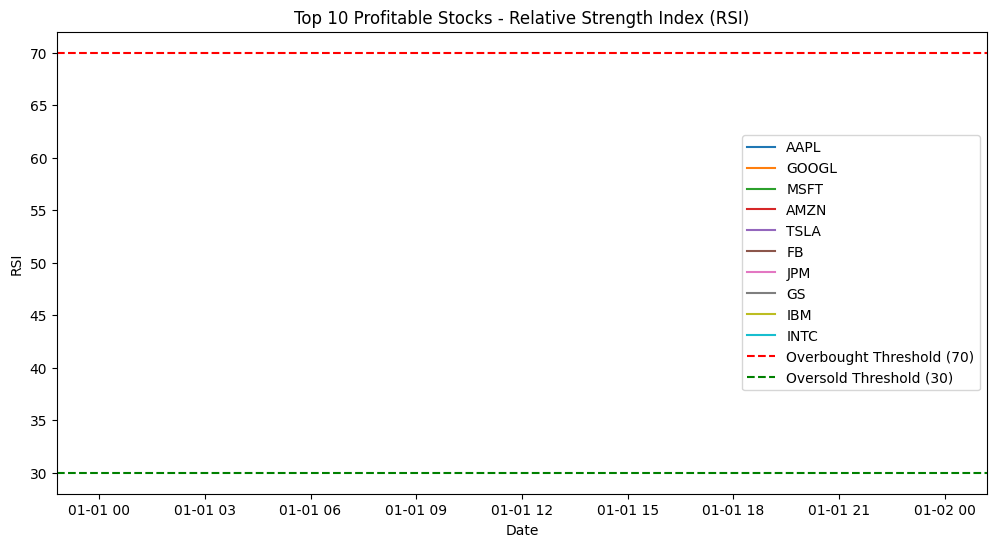

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Replace the list 'top_10_symbols' with the symbols of your choice
top_10_symbols = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA", "FB", "JPM", "GS", "IBM", "INTC"]

# Define the time period for historical data
start_date = '2021-01-01'
end_date = '2022-01-01'

# Create an empty DataFrame to store historical stock prices
historical_prices = pd.DataFrame()

# Fetch historical data for each stock
for symbol in top_10_symbols:
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    historical_prices[symbol] = stock_data['Close']

# Calculate daily returns for each stock
returns = historical_prices.pct_change().dropna()

# Define the period for RSI calculation
rsi_period = 14

# Calculate the average gain and average loss for each stock
avg_gain = returns[returns > 0].rolling(window=rsi_period).mean()
avg_loss = -returns[returns < 0].rolling(window=rsi_period).mean()

# Calculate the relative strength (RS) for each stock
rs = avg_gain / avg_loss

# Calculate the RSI for each stock
rsi = 100 - (100 / (1 + rs))

# Plotting the RSI for each stock
plt.figure(figsize=(12, 6))

for symbol in top_10_symbols:
    plt.plot(rsi.index, rsi[symbol], label=symbol)

plt.title('Top 10 Profitable Stocks - Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.axhline(70, color='r', linestyle='--', label='Overbought Threshold (70)')
plt.axhline(30, color='g', linestyle='--', label='Oversold Threshold (30)')
plt.legend()

plt.show()
